## 절차
1. 데이터셋 확인 - 대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재합니다. 이를 확인하고, 향후 수정합니다.

1. 탐색적 데이터 분석(exploratory data analysis) - 여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight를 얻습니다.
1. feature engineering - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering 합니다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.

1. model 만들기 - sklearn 을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn 을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을 사용할 수 도 있습니다.

1. 모델 학습 및 예측 - trainset 을 가지고 모델을 학습시킨 후, testset 을 가지고 prediction 합니다.

1. 모델 평가 - 예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다. 학습된 모델이 어떤 것을 학습하였는 지 확인해봅니다.


In [0]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()

plt.style.use('seaborn') # 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 
sns.set(font_scale=2.5) # scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를
# 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.
import missingno as msno
import warnings # ignore warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls


In [0]:
## kaggle.json으로 key를 매번 업로드 해줘야 사용가능한 방법
# ! kaggle datasets list
# ! kaggle competitions download -c titanic
# ! mkdir train
# ! unzip train.zip -d train

In [0]:
# !pip install -q kaggle
# from google.colab import files
# path = '/content/drive/My Drive/data/pandas/titanic/'
# files.upload()
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [0]:
### From google drive
# path = '/content/drive/My Drive/data/pandas/titanic/'

### From Git 파일 선택후, Raw 으로 보기 후 주소복사
# 깃에 업로드 된것의 주소를 알때 사용가능한 방법
path='https://raw.githubusercontent.com/y0ngma/pj03_Titanic/master/titanic/'

df_train      = pd.read_csv(path + 'train.csv')
df_test       = pd.read_csv(path + 'test.csv')
df_submission = pd.read_csv(path + 'gender_submission.csv', sep='\t')

## 1.데이터셋 확인


In [0]:
# df_train.info()
# df_test.info()

In [0]:
# df_train.describe()


### 1.1 Null data check
- 데이터셋 확인 - 대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재합니다. 이를 확인하고, 향후 수정합니다.


In [0]:
df_train.shape, df_test.shape

((891, 12), (418, 11))

In [0]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(
        col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]) )
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [0]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(
        col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]) )
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


- Train, Test set 에서 Age(둘다 약 20%), Cabin(둘다 약 80%), Embarked(Train만 0.22%) null data 존재하는 것을 볼 수 있습니다.
- MANO 라는 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼 수 있습니다.

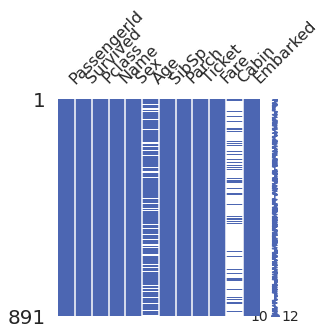

In [0]:
msno.matrix( df=df_train.iloc[:, :], figsize=(4,4), color=(0.3, 0.4, 0.7) )

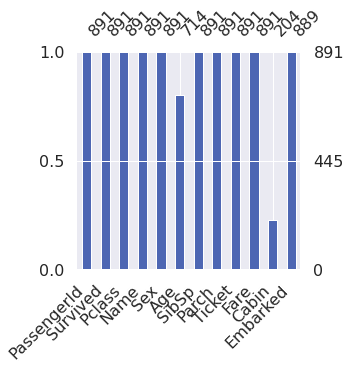

In [0]:
msno.bar(df=df_train.iloc[:, :], figsize=(4,4), color=(0.3, 0.4, 0.7))

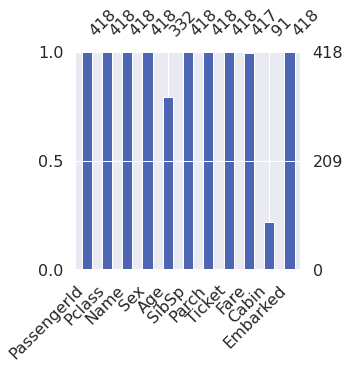

In [0]:
msno.bar(df=df_test.iloc[:, :], figsize=(4,4), color=(0.3, 0.4, 0.7))

### 1.2Target label 확인

- target label 이 어떤 distribution 을 가지고 있는 지 확인해봐야 합니다.
- 지금 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있습니다.

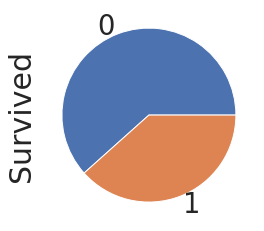

In [0]:
 df_train['Survived'].value_counts().plot.pie()

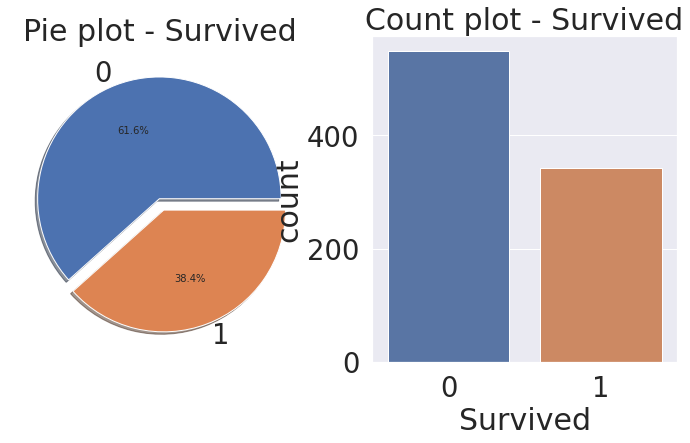

In [0]:
f, ax = plt.subplots(1, 2, figsize=(12,6))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 안타깝게도 죽은 사람이 많습니다.
- 38.4 % 가 살아남았습니다.
- target label 의 분포가 제법 균일(balanced)합니다. 불균일한 경우, 예를 들어서 100중 1이 99개 이고, 0이 1개인 경우에는 만약 모델이 모든것을 1이라 해도 정확도가 99%가 나오게 됩니다. 0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 됩니다. 지금 문제에서는 그렇지 않으니 계속 진행하겠습니다.

## 2.Exploratory data analysis


### 2.1 P class

- 먼저 Pclass 에 대해서 살펴보겠습니다. Pclass 는 ordinal, 서수형 데이터입니다. 카테고리이면서, 순서가 있는 데이터 타입입니다.
- 먼저 Pclass 에 따른 생존률의 차이를 살펴보겠습니다. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe 에서는 groupby 를 사용하면 쉽게 할 수 있습니다. 또한 pivot 이라는 메소드도 있습니다.
- 'Pclass', 'Survived' 를 가져온 후, pclass 로 묶습니다. 그러고 나면 각 pclass 마다 0, 1 이 count가 되는데, 이를 평균내면 각 pclass 별 생존률이 나옵니다
- 아래와 같이 count() 를 하면, 각 class 에 몇명이 있는 지 확인할 수 있으며, sum() 을 하면, 216 명중 생존한(survived=1)사람의 총합을 주게 됩니다

In [0]:
df_train[['Pclass', 'Survived']].tail(2)

,Pclass,Survived
889,1,1
890,3,0


In [0]:
# grouped 객체에 mean() 을 하게 되면, 각 클래스별 생존률을 얻을 수 있습니다.
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(
    by='Survived', ascending=False)
# 보다시피, Pclass 가 좋을 수록(1st) 생존률이 높은 것을 확인할 수 있습니다.

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [0]:
df_train[['Pclass', 'Survived']].groupby(['Survived']).count()

,Pclass
Survived,
0,549
1,342


In [0]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [0]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [0]:
# pandas 의 crosstab 을 사용하면 좀 더 수월하게 볼 수 있습니다.
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


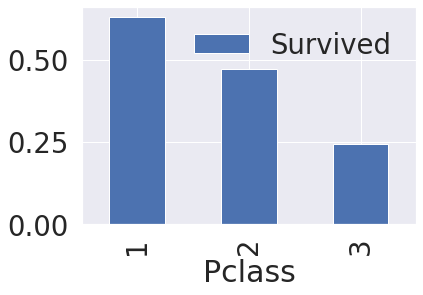

In [0]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(
    by='Survived', ascending=False).plot.bar()
# seaborn 의 countplot 을 이용하면, 특정 label 에 따른 개수를 확인해볼 수 있습니다.

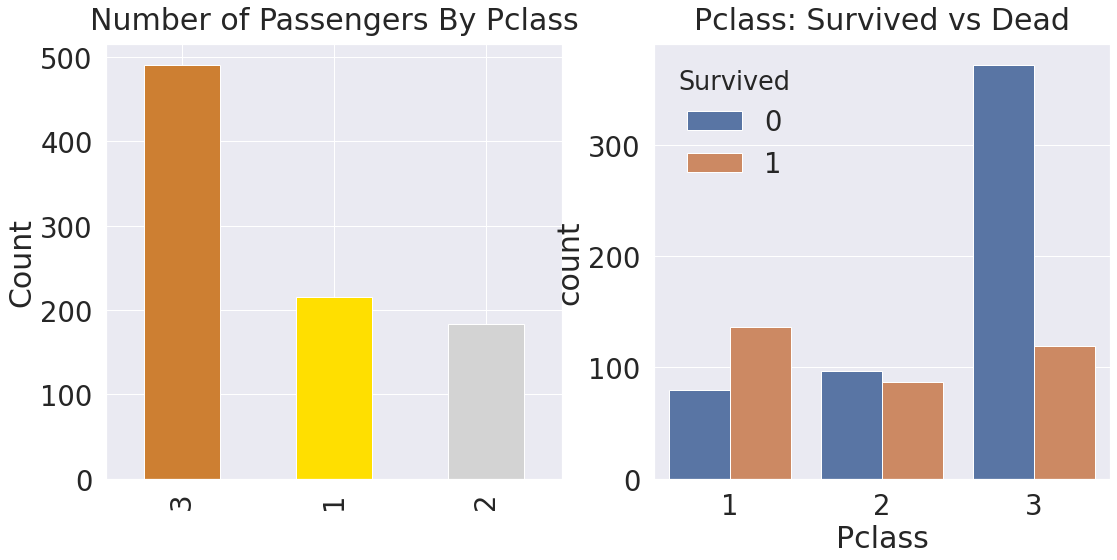

In [0]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

- 클래스가 높을 수록, 생존 확률이 높은걸 확인할 수 있습니다. 
- Pclass 1, 2, 3 순서대로 63%, 48%, 25% 입니다
- 우리는 생존에 Pclass 가 큰 영향을 미친다고 생각해볼 수 있으며, 나중에 모델을 
- 세울 때 이 feature 를 사용하는 것이 좋을 것이라 판단할 수 있습니다.

### 2.2Sex

- 이번에는 성별로 생존률이 어떻게 달라지는 지 확인해보겠습니다.
- 마찬가지로 pandas groupby 와 seaborn countplot 을 사용해서 시각화해봅시다.

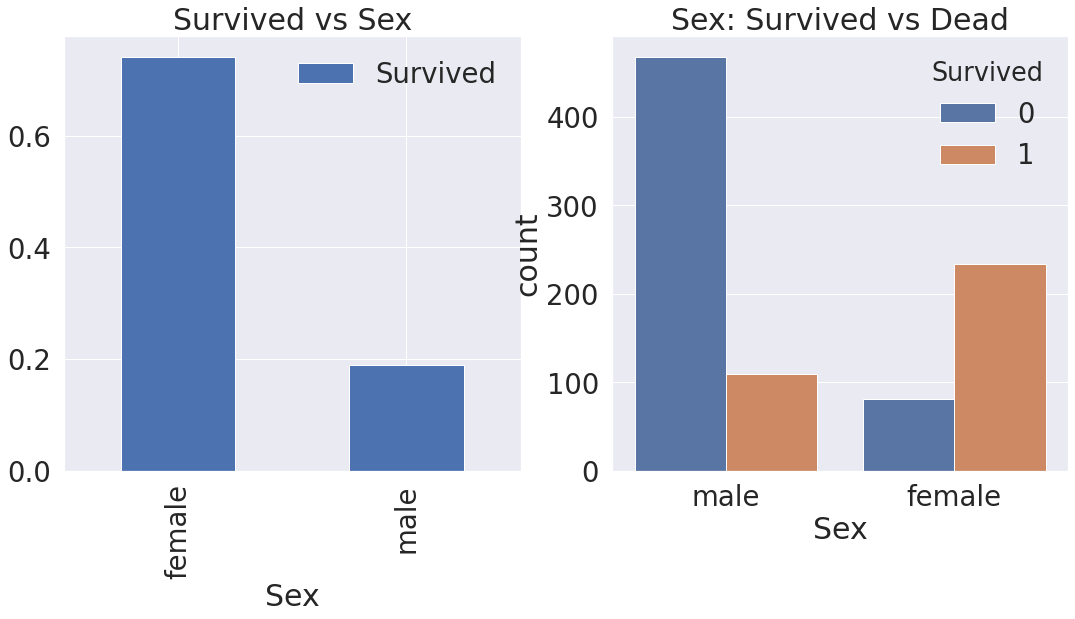

In [0]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [0]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [0]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')
# Pclass 와 마찬가지로, Sex 도 예측 모델에 쓰일 중요한 feature 임을 알 수 있습니다

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### 2.3Both Sex and Pclass

- 이번에는 Sex, Pclass 두가지에 관하여 생존이 어떻게 달라지는 지 확인해 봅시다
- seaborn 의 factorplot 을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있습니다

### 2.4Age

In [0]:
print( '제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()) )
print( '제일 어린 탑승객      : {:.1f} Years'.format(df_train['Age'].min()) )
print( '탑승객 평균 나이      : {:.1f} Years'.format(df_train['Age'].mean()) )

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객      : 0.4 Years
탑승객 평균 나이      : 29.7 Years


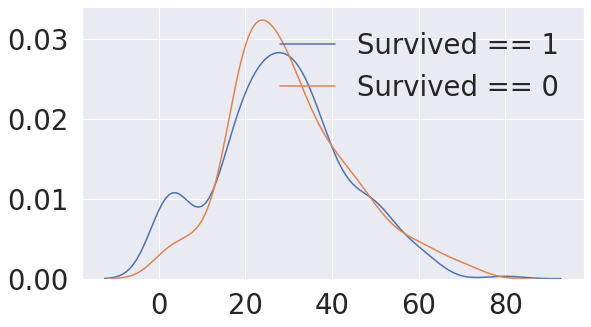

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

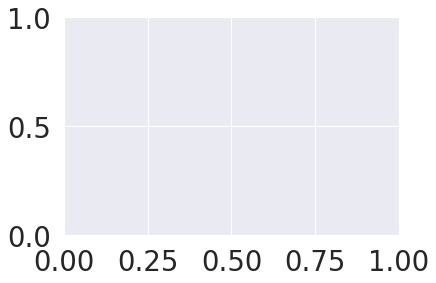

In [0]:
fig, ax = plt.subplots()
# fig, ax = plt.subplots(1, 1) # 동일 결과

In [0]:
df_train[df_train['Survived'] == 1].tail(2)
# sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'])
# plt.show()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0,C148,C


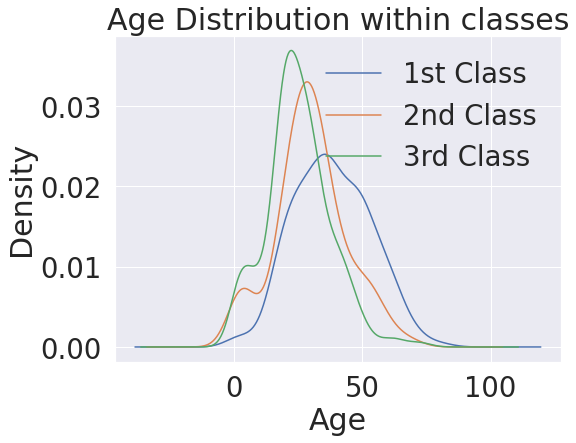

In [0]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

- Class 가 높을 수록 나이 많은 사람의 비중이 커짐
- 나이대가 변하면서 생존률이 어떻게 되는 지 보려고 합니다.
- 나이범위를 점점 넓혀가며, 생존률이 어떻게 되는지 한번 봅시다.

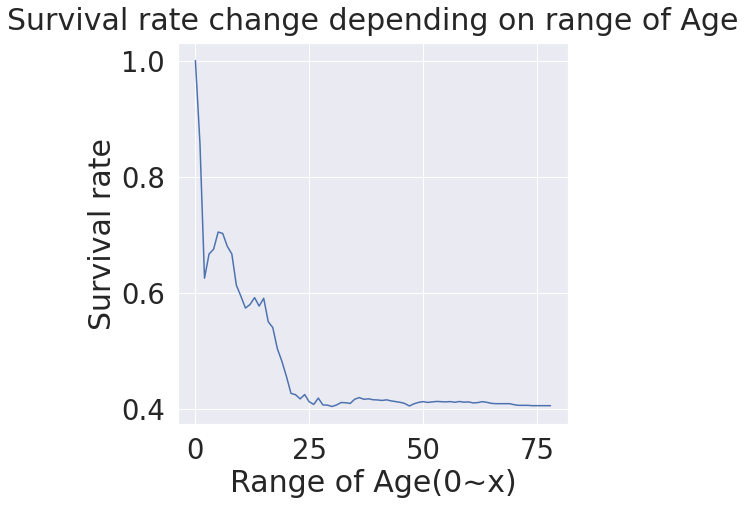

In [0]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(
        df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 보시다시피, 나이가 어릴 수록 생존률이 확실히 높은것을 확인할 수 있습니다.
- 우리는 이 나이가 중요한 feature 로 쓰일 수 있음을 확인했습니다.

### 2.5Pclass, Sex, Age

- 지금까지 본, Sex, Pclass, Age, Survived 모두에 대해서 보고싶습니다. 이를 쉽게 그려주는 것이 seaborn 의 violinplot 입니다.
- x 축은 우리가 나눠서 보고싶어하는 case(여기선 Pclass, Sex) 를 나타내고, y 축은 보고 싶어하는 distribution(Age) 입니다.

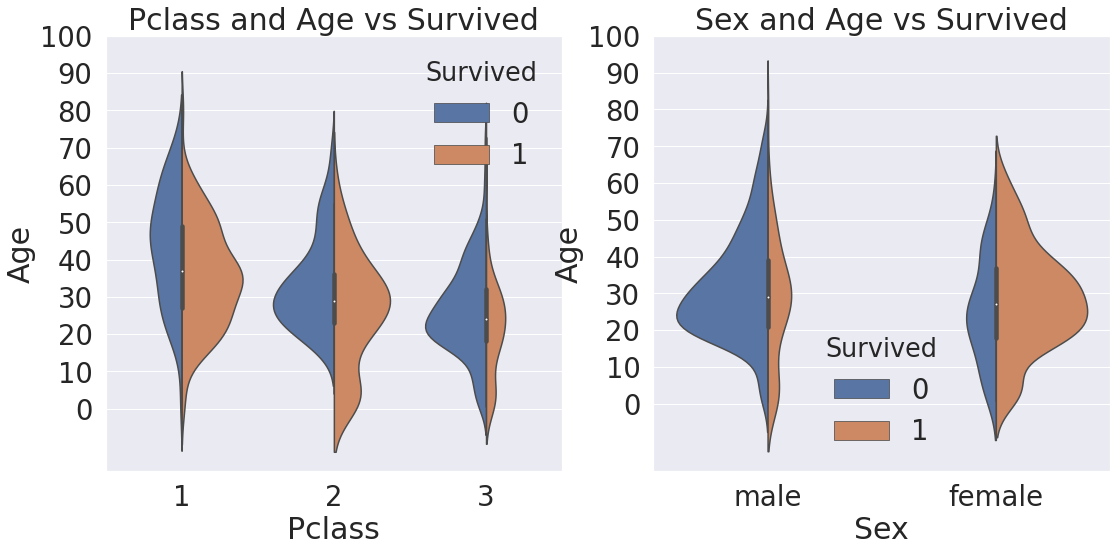

In [0]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- 왼쪽 그림은 Pclass 별로 Age의 distribution 이 어떻게 다른지, 거기에 생존여부에 따라 구분한 그래프입니다.
- 오른쪽 그림도 마찬가지 Sex, 생존에 따른 distribution 이 어떻게 다른지 보여주는 그래프입니다.
- 생존만 봤을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한것을 볼 수 있습니다.
- 오른쪽 그림에서 보면, 명확히 여자가 생존을 많이 한것을 볼 수 있습니다.
- 여성과 아이를 먼저 챙긴 것을 볼 수 있습니다.

### 2.6Embarked

- Embarked 는 탑승한 항구를 나타냅니다.
- 위에서 해왔던 것과 비슷하게 탑승한 곳에 따르 생존률을 보겠습니다.


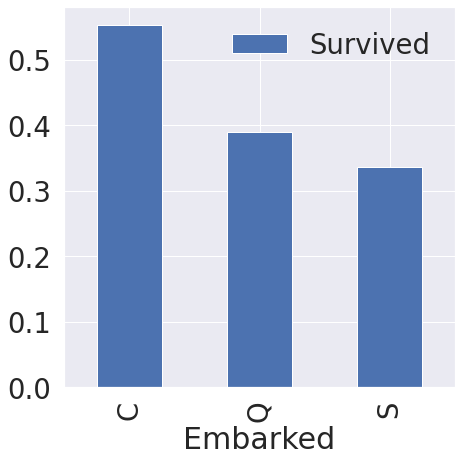

In [0]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

- 보시다시피, 조금의 차이는 있지만 생존률은 좀 비슷한 거 같습니다. 그래도 C가 제일 높군요.
- 모델에 얼마나 큰 영향을 미칠지는 모르겠지만, 그래도 사용하겠습니다.
- 사실, 모델을 만들고 나면 우리가 사용한 feature 들이 얼마나 중요한 역할을 했는지 확인해볼 수 있습니다. 이는 추후에 모델을 만들고 난 다음에 살펴볼 것입니다.
- 다른 feature 로 split 하여 한번 살펴보겠습니다

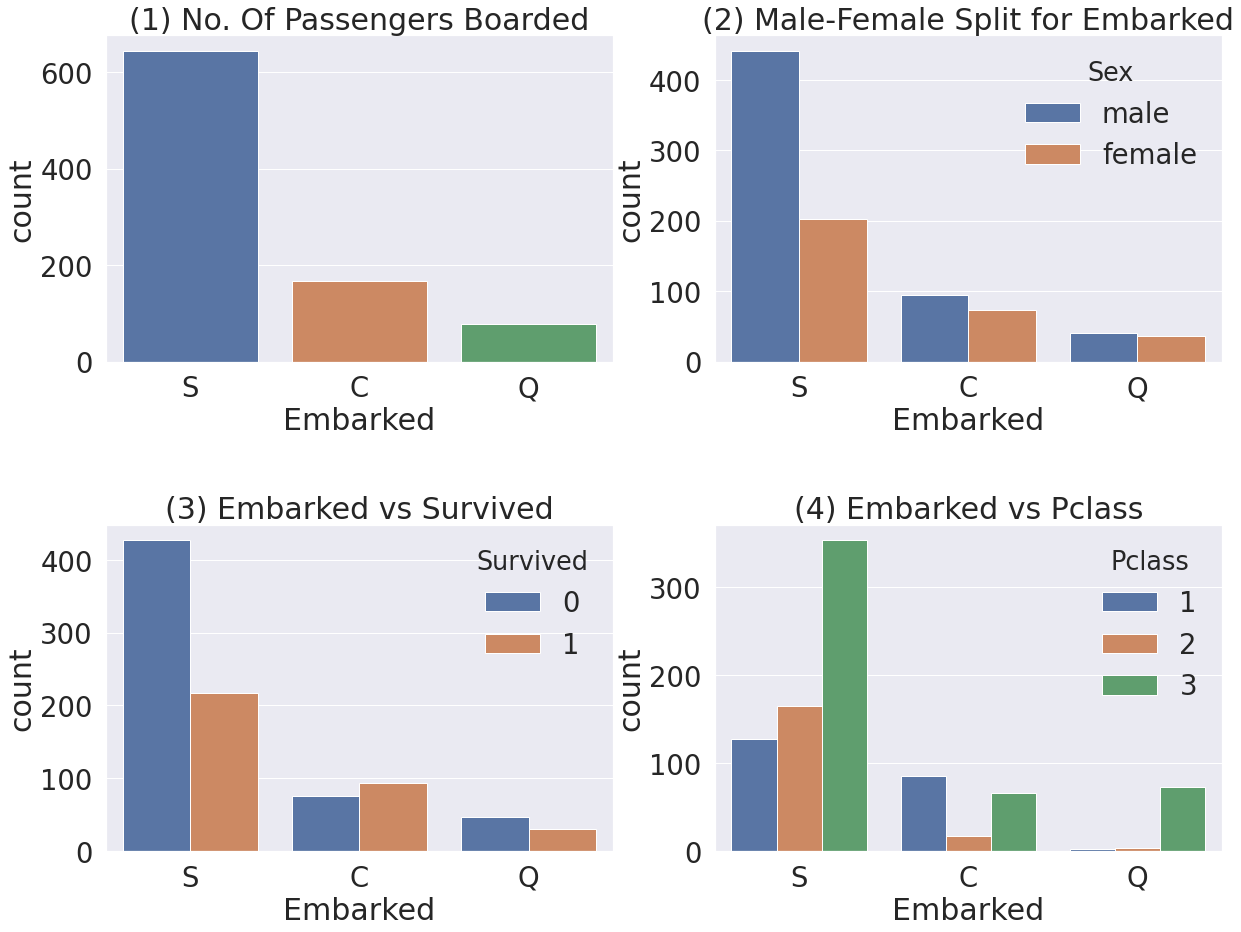

In [0]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 2.7Family - SibSp(형제 자매) + Parch(부모, 자녀)

In [0]:
 df_train[['SibSp','Parch']].tail(3)

,SibSp,Parch
888,1,2
889,0,0
890,0,0


In [0]:
# 자신을 포함해야하니 1을 더합니다
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] +1
df_test['FamilySize'] = df_test['SibSp'] + df_train['Parch'] + 1

In [0]:
print('Maxium size of Family: ', df_train['FamilySize'].max() )
print('Maxium size of Family: ', df_train['FamilySize'].min() )

Maxium size of Family:  11
Maxium size of Family:  1


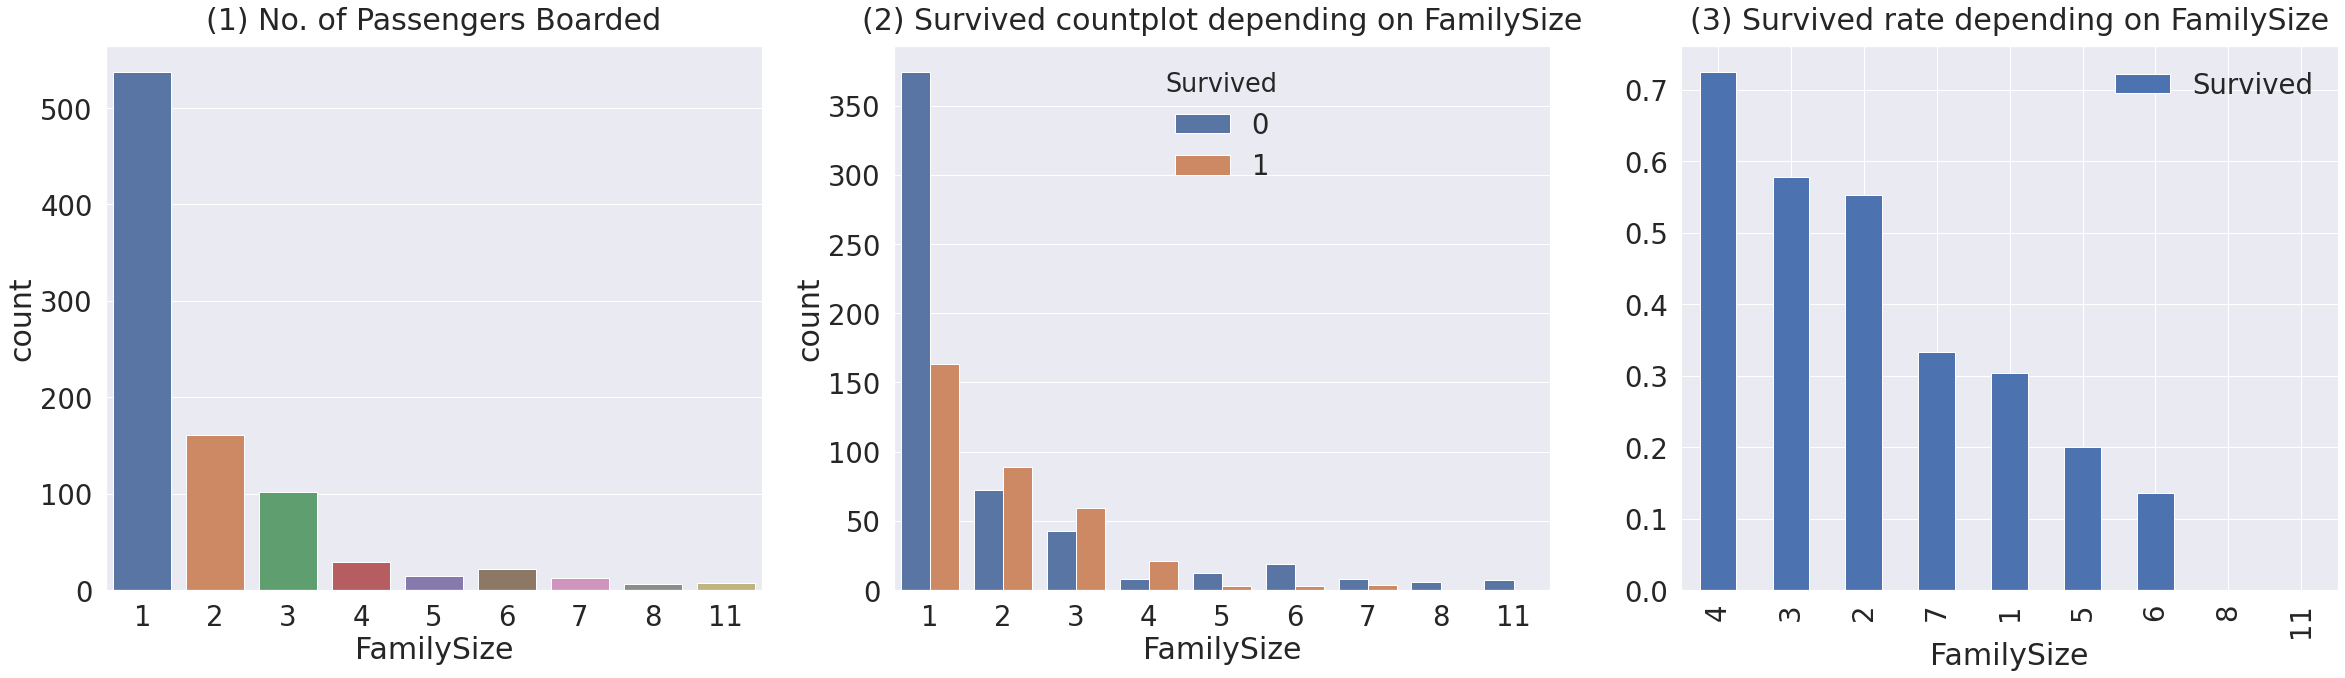

In [0]:
f, ax =plt.subplots(1,3,figsize=(40,10) )
sns.countplot( 'FamilySize', data=df_train, ax=ax[0] )
ax[0].set_title('(1) No. of Passengers Boarded', y=1.02 )

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1] )
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02 )

df_train[ ["FamilySize","Survived"] ].groupby( ["FamilySize"], as_index=True).mean().sort_values(
    by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 2.8Fare


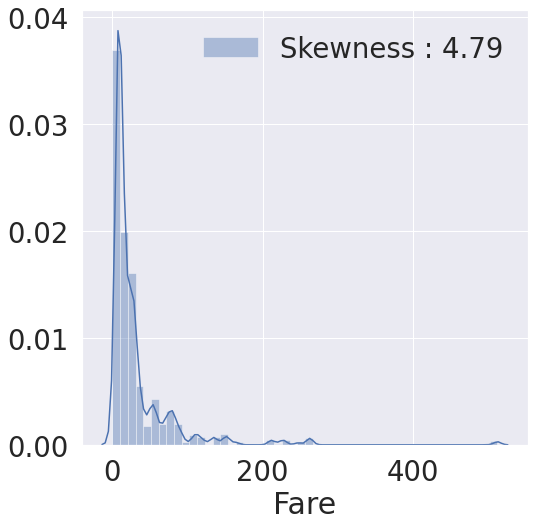

In [0]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot( df_train['Fare'], color='b', 
                 label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [0]:
df_test.loc[ df_test.Fare.isnull(), 'Fare' ] = df_test['Fare'].mean()
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

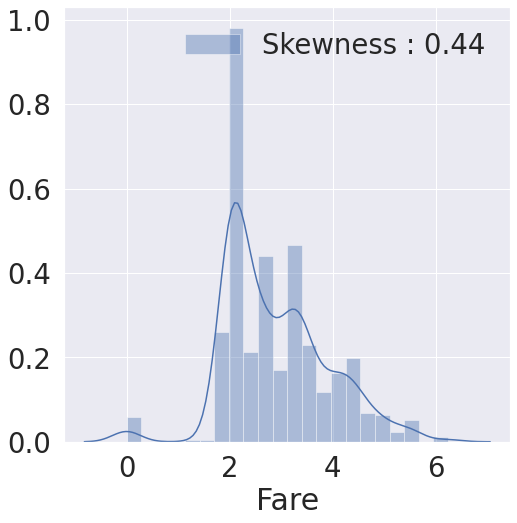

In [0]:
fig, ax = plt.subplots(1,1,figsize=(8,8) )
g = sns.distplot(df_train['Fare'], color='b', 
                 label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- log 를 취하니, 이제 비대칭성이 많이 사라진 것을 볼 수 있습니다.
- 우리는 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있습니다.
- 사실 방금한 것은 feature engineering 에 들어가는 부분인데, 여기서 작업했습니다.
- 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature 들에 여러 조작을 가하거나, 새로운 feature를 추가하는 것을 feature engineering 이라고 하는데, 우리는 이제 그것을 살펴볼 것입니다.

### 2.9Cabin
- 이 feature 는 NaN 이 대략 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지는 않습니다.
- 그러므로 우리가 세우려는 모델에 포함시키지 않도록 하겠습니다

In [0]:
df_train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2


### 2.10Ticket
- 이 feature 는 NaN 은 없습니다. 일단 string data 이므로 우리가 어떤 작업들을 해주어야 실제 모델에 사용할 수 있는데, 이를 위해선 사실 아이디어가 필요합니다.

In [0]:
df_train['Ticket'].value_counts()

CA. 2343             7
1601                 7
347082               7
CA 2144              6
347088               6
                    ..
364500               1
C.A. 17248           1
240929               1
STON/O 2. 3101288    1
244361               1
Name: Ticket, Length: 681, dtype: int64

- 보시다시피, ticket number 는 매우 다양합니다. 우리는 여기서 어떤 특징을 이끌어내서 생존과 연결시킬 수 있을까요?
- 여러분이 직접 한번 아이디어를 내보세요! 이것이 본격적인 캐글 레이스의 시작점입니다 ^^
- 이 튜토리얼에서는 튜토리얼이니 일단 ticket 은 넘기도록 하겠습니다. 튜토리얼을 끝낸 후, 여러분의 모델의 성능을 향상시키기 위해 ticket 에서 정보를 이끌어내는 것도 좋겠네요!
- 본 튜토리얼은 https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python, https://www.kaggle.com/startupsci/titanic-data-science-solutions, https://www.kaggle.com/ash316/eda-to-prediction-dietanic, https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling 을 참고하여 만들었습니다. 공유해준 캐글러께 감사드립니다.

## 3. Feature Engineering
- 본격적인 feature engineering 을 시작해보겠습니다.
- 가장 먼저, dataset 에 존재하는 null data를 채우려고 합니다.
- 아무 숫자로 채울 수는 없고, null data 를 포함하는 feature 의 statistics 를 참고하거나, 다른 아이디어를 짜내어 채울 수 있습니다.
- null data 를 어떻게 채우느냐에 따라 모델의 성능이 좌지우지될 수 있기 때문에, 신경써줘야할 부분입니다.
- Feature engineering 은 실제 모델의 학습에 쓰려고 하는 것이므로, train 뿐만아닐라 test 도 똑같이 적용해주어야 합니다. 잊지맙시다.